In [1]:
import torch
import matplotlib.pyplot as plt
import polytope as pc

In [45]:
state_dimen = 2
action_dimen = 2
x_max = 10
y_max = 10
T = 40

obstacle_constraints = [pc.box2poly([[4, 5], [4, 5]])]
safe_constraint = pc.box2poly([[7, 8], [7, 8]])

In [23]:
def dynamics(s, a):
    assert s.shape == (state_dimen,)
    assert a.shape == (action_dimen,)
    
    return s + a

def objective_cost(t):
    return 0

def check_intersect(t, c):
    assert t.shape[1] == state_dimen
    for i in range(t.shape[0]):
        if t[i].numpy() in c:
            return True
    return False

def constraint_cost(t):
    cost = 0
    
    for c in obstacle_constraints:
        if check_intersect(t, c):
            cost += 1
    
    if check_intersect(t, safe_constraint):
        cost += 1
        
    # Actions?
    
    return cost

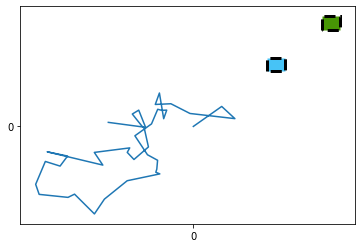

In [48]:
def plot_trajs(axes, ts):
    axes.set_xticks([0, x_max])
    axes.set_yticks([0, y_max])
    
    obstacle_constraints[0].plot(ax=axes)
    safe_constraint.plot(ax=axes)
    
    for t in ts:
        xs = [s[0].item() for s in t]
        ys = [s[1].item() for s in t]
        axes.plot(xs, ys)
    
a_dist = torch.distributions.Normal(torch.zeros((T, action_dimen)), torch.ones(T, action_dimen))
aes = a_dist.sample()

t = [torch.tensor([0, 0], dtype=torch.float)]
for a in aes:
    t.append(dynamics(t[-1], a))
    
axes = plt.axes()
plot_trajs(axes, [t])
plt.show()

tensor([-0.5521,  1.1039])
tensor([ 1.0439, -0.7478])
tensor([0.1652, 0.7849])
tensor([-1.3026, -0.3922])
tensor([0.7330, 1.2623])
tensor([-1.0687, -0.7226])
tensor([ 0.5993, -1.0912])
tensor([ 1.1459, -0.3476])
tensor([-0.9909,  1.0988])
tensor([ 0.8709, -0.5737])
tensor([0.5551, 0.6813])
tensor([-0.4386, -0.2578])
tensor([ 1.1157, -0.1205])
tensor([-0.0775,  0.4435])
tensor([-0.3626, -0.8952])
tensor([-0.8293, -0.0180])
tensor([-1.4605,  0.1083])
tensor([1.8463, 1.0060])
tensor([0.6586, 0.8389])
tensor([-1.1280,  0.1612])
